In [1]:
using Distances
using DataFrames
using Random
using LightGraphs
using GraphPlot
# using Graphs


# Random matrix
this file contains generation of random matrix, but was originally created as for geometric matrix. The names of the variables here should be changed.


### Unit cube of dimension "dimension" with the size of dimension "dims_size"

In [2]:
N = 50

dimensions = 5
dim_size = 20
dimenios_tuple = ntuple(i -> i=dim_size, dimensions)

unit_cube = rand(Float64, dimenios_tuple)

print("Unit cube size: ")
println(size(unit_cube))

Unit cube size: (20, 20, 20, 20, 20)


In [3]:
# # Checking how pairwise works:
# unit_cube = [r+c for r in 0:N-1, c in 1:N]
# geometric_matrix = pairwise(Euclidean(), unit_cube, dims=1)

### Creation of the matrix with random indicies of matrix "unit_cube"
1. Get all indicies from the cube.
2. Change the type of data from EuclidesianCoorinates to Int.
3. Shuffle the order of the indicies.
4. Take N data samples from the data.

In [4]:
random_indicies = zeros(Int, dimensions,N)
# 1.
indicies_collection_cart = findall(x->x>0, unit_cube) # For Cartesian type coordinates
# indicies_collection_int = zeros(Int, dimensions, size(indicies_collection_cart)[1]) # For Int type coordinates

# # 2.
# for k in range(1, stop=size(indicies_collection_cart)[1]) #HORIZONTAL
#     tuple = Tuple(indicies_collection_cart[k])

#     for m in 1:length(tuple)        #VERTICAL
#         indicies_collection_int[m,k] = tuple[m]
#     end
# #     indicies_collection_int[1,k] = indicies_collection_cart[k][1]
# #     indicies_collection_int[2,k] = indicies_collection_cart[k][2]
# end

# 3.
rand!(indicies_collection_cart, indicies_collection_cart)
# rand!(indicies_collection_int, indicies_collection_int)

# 4.
random_indicies = indicies_collection_cart[1:N]

# random_indicies_old = indicies_collection_int[:,1:N]

# print("random_indicies: ")
# println(size(random_indicies))

# println(random_indicies)

50-element Array{CartesianIndex{5},1}:
 CartesianIndex(14, 11, 4, 2, 12)  
 CartesianIndex(11, 6, 9, 17, 15)  
 CartesianIndex(10, 10, 17, 12, 14)
 CartesianIndex(9, 17, 10, 17, 20) 
 CartesianIndex(2, 7, 13, 11, 11)  
 CartesianIndex(11, 15, 7, 11, 13) 
 CartesianIndex(6, 6, 5, 8, 3)     
 CartesianIndex(6, 7, 12, 17, 18)  
 CartesianIndex(10, 5, 17, 12, 17) 
 CartesianIndex(17, 6, 18, 2, 16)  
 CartesianIndex(9, 13, 1, 15, 13)  
 CartesianIndex(9, 20, 17, 10, 6)  
 CartesianIndex(13, 15, 12, 6, 12) 
 ⋮                                 
 CartesianIndex(11, 18, 10, 12, 6) 
 CartesianIndex(18, 6, 4, 7, 20)   
 CartesianIndex(16, 4, 6, 4, 8)    
 CartesianIndex(7, 18, 14, 2, 8)   
 CartesianIndex(14, 10, 6, 1, 9)   
 CartesianIndex(5, 1, 8, 10, 1)    
 CartesianIndex(2, 15, 19, 16, 9)  
 CartesianIndex(9, 1, 17, 2, 10)   
 CartesianIndex(6, 1, 17, 8, 10)   
 CartesianIndex(16, 6, 1, 8, 14)   
 CartesianIndex(11, 20, 16, 12, 14)
 CartesianIndex(16, 6, 14, 9, 14)  

### Creating matrix "cated_values" with values of unit cube. The order is of values is determined by the indicies which are stored in "random_indicies" 

In [5]:
casted_values = zeros(N,1)

for k in 1:N
    casted_values[k] = unit_cube[random_indicies[k]]
    println(casted_values[k])
end

0.5319732650098556
0.1394194848907333
0.43219278394902294
0.44142054474597425
0.022136042197192785
0.9035431439113677
0.01925784132759878
0.5863408994829893
0.6890772310595101
0.5706891820045161
0.5325252566008334
0.32959170896964474
0.6515659676900707
0.8464509812662417
0.08953035200057347
0.29613126692450487
0.5059704312255442
0.6099066846993297
0.15430443347860368
0.4709039596401974
0.4756616359918491
0.8751015438253971
0.8977745727190678
0.33256883659184266
0.65279699624384
0.3946057005426631
0.03569850404938513
0.07298566584389587
0.1932818618848977
0.31594559602998573
0.7655680637886391
0.3991167191902294
0.14125533254910194
0.9580607878411282
0.9306606859746775
0.07869367302337515
0.9479743966581915
0.05808720905659115
0.23032692981884817
0.0902145081872241
0.40053770585022663
0.8060546044190775
0.5620459042661197
0.021971468492379298
0.6634524588152537
0.6444809318365283
0.8721594330782132
0.8828077870311137
0.24771471121929234
0.5618097226547716


### Computing distance between casted points stored in "casted_values"

In [6]:
geometric_matrix = pairwise(Euclidean(), casted_values, dims=1)

50×50 Array{Float64,2}:
 0.0          0.392554   0.0997805   …  0.350835   0.284259   0.0298365  
 0.392554     0.0        0.292773       0.743388   0.108295   0.42239    
 0.0997805    0.292773   0.0            0.450615   0.184478   0.129617   
 0.0905527    0.302001   0.00922776     0.441387   0.193706   0.120389   
 0.509837     0.117283   0.410057       0.860672   0.225579   0.539674   
 0.37157      0.764124   0.47135     …  0.0207354  0.655828   0.341733   
 0.512715     0.120162   0.412935       0.86355    0.228457   0.542552   
 0.0543676    0.446921   0.154148       0.296467   0.338626   0.0245312  
 0.157104     0.549658   0.256884       0.193731   0.441363   0.127268   
 0.0387159    0.43127    0.138496       0.312119   0.322974   0.00887946 
 0.000551992  0.393106   0.100332    …  0.350283   0.284811   0.0292845  
 0.202382     0.190172   0.102601       0.553216   0.081877   0.232218   
 0.119593     0.512146   0.219373       0.231242   0.403851   0.0897562  
 ⋮            

### Creating matrix ordering "matrix_ordering" of matrix "geometric_matrix"

Find the maximum value, return indicies, remove it, repeat until all are 0.0, inverse matrix.

First element in "matrix ordering" is of lowest value.

(The indexing is inversed in comparison to the article)

In [7]:
# How many elements above diagonal are in matrix?
elemnts_above_diagonal = Int((N^2-N)/2)

matrix_ordering = zeros(Int, 2,elemnts_above_diagonal)

A = copy(geometric_matrix)

k=1

for element in range(1,stop=elemnts_above_diagonal)
#     Find maximal distance
    maximal_value = findmax(A)
#     Get the coordinates
    matrix_ordering[1,k] = Int(maximal_value[2][1])
    matrix_ordering[2,k] = Int(maximal_value[2][2])

#     Zero maxval in A (above and below diagonal) so next maxval can be found
    A[matrix_ordering[1,k], matrix_ordering[2,k]] = 0.0
    A[matrix_ordering[2,k], matrix_ordering[1,k]] = 0.0
    
    k+=1
end

# 

matrix_ordering= matrix_ordering[:,end:-1:1]

2×1225 Array{Int64,2}:
 44  50  11  40  25  41  33  44  7  47  …  35  37  34  37  44  37  34  44  34
  5  43   1  15  13  32   2   7  5  22      7  27  27   5  37   7   5  34   7

## Create nested graph
There is as much graphs as there is random indicies=N

In [8]:
# Each vertex is the column, because columns represent different elements, between which distance was measured
vetrices = N # 

# Edges are created between every points up to the level k
edges = matrix_ordering
num_of_edges = size(edges)[2]

# g = SimpleGraph(vetrices);

set_of_graphs = [a=Graph(vetrices) for a=1:num_of_edges]
edges_counter = zeros(Int, num_of_edges)
edge_density =  zeros(num_of_edges)

k=1
for k in range(1,stop=num_of_edges)~
#     set_of_graphs[k]
    add_edge!(set_of_graphs[k], edges[1,k], edges[2,k]);
    edges_counter[k] = ne(set_of_graphs[k])
    edge_density[k] = edges_counter[k]/binomial(N,2)
    if k<num_of_edges 
        set_of_graphs[k+1] = copy(set_of_graphs[k])
    end
end

Number of edges: 
300
Edge density: 
0.24489795918367346


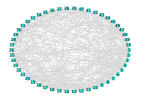

In [9]:
n=300

nodelabel = [r  for r in 1:nv(set_of_graphs[n])]
println("Number of edges: ")
println(edges_counter[n])

println("Edge density: ")
println(edge_density[n])

gplot(set_of_graphs[n], layout=circular_layout, nodelabel=nodelabel)

# Compute Betti curve for matrix_ordering

In [10]:
using Eirene
using SparseArrays

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/689c25549e9167a2e65f44c1dd863f7a1e43ce57-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/689c25549e9167a2e65f44c1dd863f7a1e43ce57-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

## "point cloud" mode

In [24]:
ezplot_pjs(matrix_ordering[:,1:500])

data: [
  "scatter with fields autocolorscale, marker, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [36]:
C = eirene(matrix_ordering[:,1:500],maxdim=2, maxrad=20,model="pc")

Dict{String,Any} with 12 entries:
  "symmat"   => [146 145 … 0 0; 145 146 … 0 0; … ; 0 0 … 146 0; 0 0 … 0 146]
  "maxnz"    => [0, 20183, 1890872, 77618218, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  492, 493, 494…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1, 2], [3, 4], [27, 20], [61, 63]…
  "phi"      => Array{Int64,1}[[], [1, 774, 7059, 20143, 9166, 9165, 20721, 207…
  "plo"      => Array{Int64,1}[[], [2, 4, 20, 63, 33, 32, 75, 71, 40, 80  …  20…
  "ocg2rad"  => [20.0, 19.9249, 19.8494, 19.799, 19.7231, 19.6977, 19.6469, 19.…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  491, 492, 493…
  "nvl2ovl"  => [437, 26, 198, 251, 114, 328, 473, 228, 68, 235  …  421, 439, 2…
  "input"    => Dict{String,Any}("genera"=>[44 50 … 29 46; 5 43 … 4 26],"time"=…
  "tid"      => Array{Int64,1}[[], [2, 4, 20, 63, 33, 32, 75, 71, 40, 80  …  41…
  "grain"    => Array{Int64,1}[[146, 146, 146, 146, 146, 146, 146, 146, 146, 14…

In [37]:
plotpersistencediagram_pjs(C,dim=1)

data: [
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y",
  "scatter with fields hoverinfo, marker, mode, text, textfont, textposition, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [41]:
plotbetticurve_pjs(C, dim=1)

data: [
  "scatter with fields line, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

In [11]:
#1 D is created from matrix ordering
D = zeros(Int,N,N)

for k in range(1,stop=n) # n from the jupytrt cell in which graph is created 
# println(matrix_ordering[:,k])
    D[matrix_ordering[1,k], matrix_ordering[2,k]] += 1
    D[matrix_ordering[2,k], matrix_ordering[1,k]] += 1
end

# for row in eachrow(D)
#     println(row)
# end

# C = eirene(D,maxdim=3,model="vr")

Dict{String,Any} with 12 entries:
  "symmat"   => [2 1 … 2 2; 1 2 … 2 2; … ; 2 2 … 2 1; 2 2 … 1 2]
  "maxnz"    => [0, 413, 9291, 91391, 480411, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  42, 43, 44, 4…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1]], [], [], [[3690, 3700, 4065, …
  "phi"      => Array{Int64,1}[[], [19, 17, 11, 8, 6, 4, 196, 195, 34, 199  …  …
  "plo"      => Array{Int64,1}[[], [20, 18, 12, 9, 7, 5, 11, 10, 35, 14  …  21,…
  "ocg2rad"  => [1.0, 0.0]
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 4…
  "nvl2ovl"  => [34, 37, 6, 35, 39, 42, 49, 14, 16, 22  …  19, 21, 33, 3, 4, 10…
  "input"    => Dict{String,Any}("genera"=>[0 0 … 0 1; 0 0 … 1 0; … ; 0 1 … 0 0…
  "tid"      => Array{Int64,1}[[], [20, 18, 12, 9, 7, 5, 11, 10, 35, 14  …  19,…
  "grain"    => Array{Int64,1}[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2,…

In [12]:
# ezplot_pjs(set_of_graphs[n])

In [13]:
C = eirene(geometric_matrix,maxdim=2,model="vr")

Dict{String,Any} with 12 entries:
  "symmat"   => [889 867 … 1 1; 867 889 … 1 1; … ; 1 1 … 889 866; 1 1 … 866 889]
  "maxnz"    => [0, 1171, 14208, 116038, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  42, 43, 44, 4…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[46, 43], [40, 39], [40, 37], [40,…
  "phi"      => Array{Int64,1}[[], [1200, 1160, 1136, 1059, 1036, 791, 761, 446…
  "plo"      => Array{Int64,1}[[], [43, 39, 37, 32, 31, 21, 20, 11, 6, 3  …  14…
  "ocg2rad"  => [Inf, 0.482399, 0.48227, 0.481159, 0.480496, 0.480475, 0.477554…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 4…
  "nvl2ovl"  => [3, 4, 20, 21, 1, 11, 17, 32, 41, 26  …  48, 27, 23, 5, 44, 6, …
  "input"    => Dict{String,Any}("genera"=>[0.0 0.392554 … 0.284259 0.0298365; …
  "tid"      => Array{Int64,1}[[], [43, 39, 37, 32, 31, 21, 20, 11, 6, 3  …  19…
  "grain"    => Array{Int64,1}[[889, 889, 889, 889, 889, 889, 889, 889, 889, 88…

In [14]:
# plotbarcode_pjs(C,dim=0:1)
plotpersistencediagram_pjs(C,dim=1)

There are no persistent homology classes in dimension 1.

In [21]:
plotbetticurve_pjs(C, dim=2)

data: [
  "scatter with fields line, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"

### "complex mdoe"
Suppose that G is the last in a nested sequence of graphs G1, G2, G3.

G1 is just the vertex v1 and G2 is the (unconnected) pair of vertices v1, v2.

1. let D be the N x N zero/one matrix with D[i,j] = 1 iff i is a face of cell j
2. S  = sparse(D)
3. rv = S.rowval
4. cp = S.colptr

5. dv[i] is the dimension of cell i
6. ev[k] is the total number of cells with dimension k-1
7. dp[k] is 1 plus the number of cells of dimension strictly less than k-1
8. If in addition we have a nested sequence of complexes E_0 ≤ ... ≤ E_n = E, then let fv be the vector such that

    fv[i] is the birthtime of cell i

#### model="complex" is useless because not a single example works in this mode
- at line 2716 there are errors in indexing

In [16]:
#1 D is created from matrix ordering
D = zeros(Int,N,N)

for k in range(1,stop=n) # n from the jupytrt cell in which graph is created 
# println(matrix_ordering[:,k])
    D[matrix_ordering[1,k], matrix_ordering[2,k]] = 1
    D[matrix_ordering[2,k], matrix_ordering[1,k]] = 1
end

for row in eachrow(D)
    println(row)
end

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [17]:
# NOT WORKING MODE

# fv = [0.1*a for a in 1:n]

# S = sparse(D)
# rv = S.rowval
# cp = S.colptr

# dv = [0,1]
# ev = [1,1]

# # C = eirene(model="complex", rv=rv,cp=cp,fv=fv, ev=ev, maxdim=1)
# C = eirene(model="complex", rv=rv,cp=cp,fv=fv, dv=dv, maxdim=1)
# # keyword input <rv> is a vector, and none of <dv>, <dp>, and <ev> is nonempty

In [18]:
# 2, 3, 4
S = sparse(D)
rv = S.rowval
cp = S.colptr

rv = [1,2]
cp = [1,1,3]

3-element Array{Int64,1}:
 1
 1
 3

In [19]:
# 5-> all the cells are in 2 dimension the number of cells does not change
dv = [0,0,1]#ones(Int, N) .* 2
 
# 6 -> the number of cells does not change
ev = [2,1,0]

# 7
dp = [1,2,4,4]

# 8  but might be set to either edge density or just sequence 1:number_of_edges
fv = [0.1*a for a in a:n]  #[a for a in 0.01:0.01:0.2]

# C = eirene(rv=rv,cp=cp, fv=fv, dp=dp, maxdim=1)
C = eirene(rv=rv,cp=cp,dv=dv,fv=fv)

#  C = eirene("/home/ed19aaf/Programming/Julia/Eirene/ez.csv",model="complex",entryformat="sp")
# C =eirene("/home/ed19aaf/Programming/Julia/Eirene/ez.csv",model="complex",  entryformat=  "dp")

UndefVarError: UndefVarError: a not defined

In [20]:
plotbetticurve_pjs(C, dim=1)

data: [
  "scatter with fields line, mode, type, x, and y"
]

layout: "layout with fields height, hovermode, margin, scene, showlegend, and width"